In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
import os
import functools as ft
files = os.listdir('datasetIOT')
dfs=[]
for file in files:
    dftmp = pd.read_csv('datasetIOT'+'/'+file)
    dfs.append(dftmp.sample(n=50))
df_final = pd.concat(dfs)

In [3]:
data=df_final['ROAD_TYPE']
values=np.array(data)
print(data)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
df_final['ROAD_TYPE']=onehot_encoded
data=df_final['POINT_1_STREET']
values=np.array(data)
print(data)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
df_final['POINT_1_STREET']=onehot_encoded

6590     MAJOR_ROAD
4101     MAJOR_ROAD
4169     MAJOR_ROAD
3232     MAJOR_ROAD
278      MAJOR_ROAD
            ...    
979      MAJOR_ROAD
2784     MAJOR_ROAD
300      MAJOR_ROAD
2084     MAJOR_ROAD
10153    MAJOR_ROAD
Name: ROAD_TYPE, Length: 2500, dtype: object
[0 0 0 ... 0 0 0]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
6590          Viengevej
4101          Ålykkevej
4169        Møllebakken
3232        Ringvej Syd
278           Søftenvej
              ...      
979           Viborgvej
2784           Genvejen
300           Viborgvej
2084     Skanderborgvej
10153                15
Name: POINT_1_STREET, Length: 2500, dtype: object
[50 52 22 ... 48 35  0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [4]:
result=df_final["vehicleCount"]
dataset=df_final.drop(labels=["Unnamed: 0.1","Unnamed: 0","POINT_2_STREET","POINT_1_CITY","event","POINT_2_CITY","vehicleCount","date"],axis=1)

In [5]:
df_final.corr().style.background_gradient(cmap='Blues')

,Unnamed: 0.1,Unnamed: 0,time,avgMeasuredTime,vehicleCount,dewptm,hum,pressurem,tempm,wdird,wspdm,POINT_1_STREET,POINT_1_LAT,POINT_2_LAT,POINT_1_LNG,POINT_2_LNG,POINT_1_NAME,POINT_2_NAME,DURATION_IN_SEC,NDT_IN_KMH,ROAD_TYPE,REPORT_ID,DISTANCE_IN_METERS
Unnamed: 0.1,1.000000,1.000000,0.011678,-0.000905,0.015086,-0.134601,0.255139,0.594095,-0.351792,-0.394385,0.040932,-0.007436,-0.001777,-0.002130,-0.002761,-0.003667,-0.007989,-0.005631,-0.004651,0.001786,0.014405,-0.001671,-0.002990
Unnamed: 0,1.000000,1.000000,0.011678,-0.000905,0.015086,-0.134601,0.255139,0.594095,-0.351792,-0.394385,0.040932,-0.007436,-0.001777,-0.002130,-0.002761,-0.003667,-0.007989,-0.005631,-0.004651,0.001786,0.014405,-0.001671,-0.002990
time,0.011678,0.011678,1.000000,-0.004512,-0.045812,-0.016590,-0.432077,-0.002071,0.371202,-0.030306,0.206275,0.001272,-0.002197,0.002276,0.009683,0.011476,-0.012801,-0.006932,-0.006496,-0.012394,0.004955,0.002493,-0.010207
avgMeasuredTime,-0.000905,-0.000905,-0.004512,1.000000,-0.079232,0.008094,-0.005698,0.002536,0.011706,-0.004628,0.013427,0.082213,-0.024001,-0.022527,0.008390,0.005243,0.082935,0.076045,0.316473,-0.011513,-0.081344,0.130914,0.253589
vehicleCount,0.015086,0.015086,-0.045812,-0.079232,1.000000,-0.028283,-0.067412,0.005001,0.048426,0.008721,0.092222,-0.034470,0.135737,0.132827,-0.043543,-0.047451,-0.036354,-0.043979,-0.161349,0.342867,0.024017,-0.313753,0.018359
dewptm,-0.134601,-0.134601,-0.016590,0.008094,-0.028283,1.000000,0.331120,0.040581,0.450640,-0.264638,-0.111477,0.006036,0.001501,0.002991,-0.001904,-0.002058,-0.001527,-0.000829,0.009954,-0.013245,-0.001647,0.009294,0.003791
hum,0.255139,0.255139,-0.432077,-0.005698,-0.067412,0.331120,1.000000,0.046664,-0.680673,0.008117,-0.419274,-0.001527,-0.001779,-0.002420,-0.000912,-0.002456,-0.000510,-0.000777,0.004869,-0.011382,0.000519,0.006774,0.000089
pressurem,0.594095,0.594095,-0.002071,0.002536,0.005001,0.040581,0.046664,1.000000,0.001637,-0.514624,-0.241245,-0.011242,0.010540,0.009471,0.005131,0.002586,0.000495,-0.001731,-0.007695,0.000112,0.014680,0.000277,-0.005368
tempm,-0.351792,-0.351792,0.371202,0.011706,0.048426,0.450640,-0.680673,0.001637,1.000000,-0.198761,0.273820,0.005371,0.004625,0.005820,-0.000870,-0.000251,0.002140,0.001472,0.003819,0.001857,-0.001377,-0.000691,0.004136
wdird,-0.394385,-0.394385,-0.030306,-0.004628,0.008721,-0.264638,0.008117,-0.514624,-0.198761,1.000000,0.061246,0.001921,-0.006956,-0.009264,0.006519,0.005727,0.002986,-0.004942,-0.002047,-0.001819,-0.007663,-0.000871,-0.001577


In [65]:
dataset=dataset.drop(labels=["date"],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(dataset, result, test_size = 0.3,random_state=5)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, Y_train)
soxe = model.predict(x_test)
print('R-Squared: %.4f' % model.score(x_test,Y_test))
print("coef",model.coef_)
print("intercept",model.intercept_)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, soxe)
print('mse:',mse)

R-Squared: 0.1738
coef [-7.42565516e-01 -1.22877505e-03 -3.36913632e+00  5.29713355e-01
  8.87007355e-02  3.62001753e+00  1.52296724e-02  7.68017207e-01
 -1.82648623e+02  4.29765594e+01  9.99592021e+00  5.56645588e+01
 -1.79886216e-03 -4.18711766e-03 -7.69100472e-02  1.39967016e+00
  5.88512141e+01 -7.26035705e-04 -4.83104428e-03]
intercept 7112.693400679174
mse: 3195.710225444567


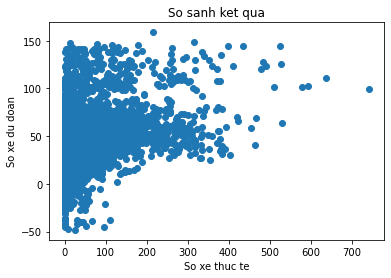

In [66]:
plt.scatter(Y_test, soxe)
plt.xlabel("So xe thuc te")
plt.ylabel("So xe du doan")
plt.title("So sanh ket qua")
plt.show()

In [12]:
result = np.where(df_final['vehicleCount']>=20,np.where(df_final['vehicleCount']>=50, 2,1), 0)

In [13]:
from sklearn import svm
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(dataset, result, test_size = 0.3,random_state=5)
model = svm.SVC(kernel='linear').fit(x_train, Y_train)


In [14]:
dudoan = model.predict(x_test)
print('R-Squared: %.4f' % model.score(x_test,Y_test))
print("coef",model.coef_)
print("intercept",model.intercept_)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, dudoan)
print('mse:',mse)

R-Squared: 0.6427
coef [[-5.72059483e+01  1.87595865e+01 -2.84574510e+01  6.91605470e+01
   2.23656641e+01 -6.01692054e+01 -1.32957138e+01 -1.91682158e+02
   1.00000000e+00  1.15646519e+00  1.06156584e+00 -6.16612747e-01
  -7.14965355e-02  3.10352132e+00 -7.89052498e+00  1.45365805e+02
   9.60852206e+00 -1.00000000e+00  3.11574191e-01 -1.05965927e+01]
 [ 3.26294899e+02  4.76291314e+00  3.00674047e+01  1.76779859e+02
  -1.28194091e+02 -4.36066509e+01  9.01140557e+00 -2.76975525e+02
   1.00000000e+00  1.21412050e+00  1.26164774e+00 -1.24959735e-01
  -7.57527822e-02  6.26188235e+00 -1.06589126e+00  3.03999511e+02
  -1.81844959e+02 -2.00000000e+00  4.88128051e-01 -1.35394494e+01]
 [ 3.51666533e+02 -2.09194229e+01  5.05345658e+01 -5.15585373e+01
  -1.40566717e+02  4.28148012e+01  1.60253049e+01 -6.72874992e+01
   0.00000000e+00  3.94810016e-01  6.37778853e-01  2.90725846e-01
   1.03270439e-01  5.39573752e+00  2.21433559e+00  5.74521021e+01
  -7.95957349e+01 -2.03478983e+00  1.65227443e-01 -

In [ ]:
from sklearn import svm